<a href="https://colab.research.google.com/github/trantoan62/AI-ANN-TranQuocToan/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


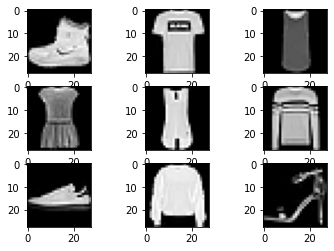

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation= 'relu' ,input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'RMSprop', 
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 200, verbose =1, validation_data = (x_test, y_test))

Epoch 1/200
469/469 [==============================] - 5s 4ms/step - loss: 0.5397 - accuracy: 0.8027 - val_loss: 0.4626 - val_accuracy: 0.8330
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3744 - accuracy: 0.8627 - val_loss: 0.4402 - val_accuracy: 0.8399
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3353 - accuracy: 0.8752 - val_loss: 0.3875 - val_accuracy: 0.8666
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3104 - accuracy: 0.8858 - val_loss: 0.4050 - val_accuracy: 0.8571
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2957 - accuracy: 0.8915 - val_loss: 0.3814 - val_accuracy: 0.8695
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2794 - accuracy: 0.8968 - val_loss: 0.3833 - val_accuracy: 0.8637
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2681 - accuracy: 0.9005 - val_loss: 0.3960 - val_accuracy: 0.8670

In [ ]:
Score = model.evaluate(x_test,y_test,verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 3.0674 - accuracy: 0.8903


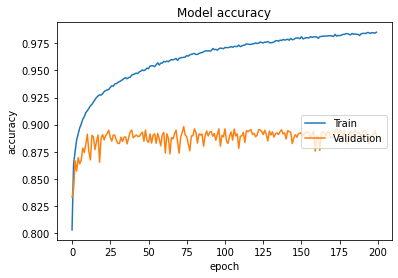

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [ ]:
y_pred = model.predict(x_test)